![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 05 | Cluster Analysis with k-Means

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [5]:
import seaborn as sns #!

df_mpg = sns.load_dataset(name='mpg', index_col='name')
df_mpg.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
buick skyhawk,21.0,6,231.0,110.0,3039,15.0,75,usa
toyota corolla 1200,32.0,4,71.0,65.0,1836,21.0,74,japan
amc hornet sportabout (sw),18.0,6,258.0,110.0,2962,13.5,71,usa
ford galaxie 500,14.0,8,351.0,153.0,4154,13.5,71,usa
chevrolet impala,13.0,8,350.0,165.0,4274,12.0,72,usa


## Feature Selection

- Select 2 columns for the modelling

In [7]:
df_mpg = sns.load_dataset(name='mpg', index_col='name')[['cylinders', 'acceleration']]
df_mpg

,cylinders,acceleration
name,,
chevrolet chevelle malibu,8,12.0
buick skylark 320,8,11.5
plymouth satellite,8,11.0
amc rebel sst,8,12.0
ford torino,8,10.5
...,...,...
ford mustang gl,4,15.6
vw pickup,4,24.6
dodge rampage,4,11.6


## Data `preprocessing`

- Do you need to *transform* the data
- To get a **truthful insight** of the model?

In [9]:
df_mpg.isna().sum()

cylinders       0
acceleration    0
dtype: int64

## `KMeans()` Model in Python

### Fit the Model

- To cluster 3 groups

In [24]:
from sklearn.cluster import KMeans

In [25]:
model_km = KMeans(n_clusters=3)

In [26]:
model_km.fit(X=df_mpg)

KMeans(n_clusters=3)

### Calculate Predictions

In [29]:
model_km.predict(X=df_mpg)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,

### Create a New DataFrame for the Predictions

In [28]:
df_pred = df_mpg.copy()
df_pred['pred_km'] = model_km.predict(X=df_mpg)
df_pred

,cylinders,acceleration,pred_km
name,,,
chevrolet chevelle malibu,8,12.0,0
buick skylark 320,8,11.5,0
plymouth satellite,8,11.0,0
amc rebel sst,8,12.0,0
ford torino,8,10.5,0
...,...,...,...
ford mustang gl,4,15.6,1
vw pickup,4,24.6,2
dodge rampage,4,11.6,1


In [51]:
from sklearn import ensemble

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_rf = RandomForestRegressor()

In [ ]:
model_rf.fit(x=cylinders, )

### Visualize the Model

- You colour the points with the the value of the predictions

<AxesSubplot:xlabel='cylinders', ylabel='acceleration'>

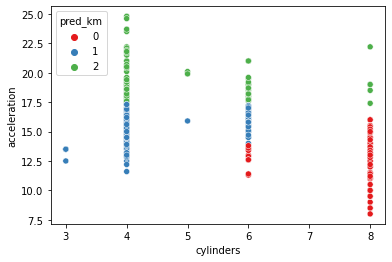

In [30]:
sns.scatterplot(x='cylinders', y='acceleration', hue='pred_km',
                palette='Set1', data=df_pred)


In [31]:
##1.4.5. MinMaxScaler() the data

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_mpg)
data = scaler.transform(X=df_mpg)
data[:5]


array([[1.        , 0.23809524],
       [1.        , 0.20833333],
       [1.        , 0.17857143],
       [1.        , 0.23809524],
       [1.        , 0.14880952]])

In [49]:
import pandas as pd
df_scaled = pd.DataFrame(data, columns=df_mpg.columns, index=df_mpg.index)
df_scaled


,cylinders,acceleration
name,,
chevrolet chevelle malibu,1.0,0.238095
buick skylark 320,1.0,0.208333
plymouth satellite,1.0,0.178571
amc rebel sst,1.0,0.238095
ford torino,1.0,0.148810
...,...,...
ford mustang gl,0.2,0.452381
vw pickup,0.2,0.988095
dodge rampage,0.2,0.214286


## Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomertive Clustering

#### Fit the Model

- To cluster 3 groups

In [50]:
from sklearn.cluster import AgglomerativeClustering

model_ac = AgglomerativeClustering(n_clusters=3)
model_ac.fit(df_scaled)


AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

#### Create a New DataFrame for the Predictions

#### Visualize the Model

### Other Model 2

#### Fit the Model

- To cluster 3 groups

#### Calculate Predictions

#### Create a New DataFrame for the Predictions

#### Visualize the Model

## Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [ ] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [ ] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - [Neural Networks](https://youtu.be/IHZwWFHWa-w?t=211) 
    - Linear Regression
    - Variance
- [ ] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [ ] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [ ] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.